## ml_handsin_learn

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys
from keras.datasets import mnist
from load_handimage_bin import load_handimage_bin

# keras用のパラメータ
batch_size = 128
#epochs = 500
epochs = 20

# 数字画像のサイズ 縦(row)と横(col)
img_rows, img_cols = 40, 40

# 学習結果を保存するファイルの決定
#if len(sys.argv)==1:
#    print('使用法: python ml-10-03-digits-cnn-learn.py 保存ファイル名.h5')
#    sys.exit()
#savefile = sys.argv[1]
savefile = "handsign.h5"

#    paths_for_train = ["./data/m01", "./data/m02", "./data/m03", "./data/m04", "./data/m05", 
#                       "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                       "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15",
#                       "./data/m16"] 

#paths_for_train = ["./data/m05", "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                   "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15", "./data/m16"] 

paths_for_train = ["./data/m01", "./data/m02", "./data/m03",
                   "./data/m05", "./data/m06", "./data/m07", "./data/m08",
                   "./data/m09", "./data/m10", "./data/m11", "./data/m12",
                    "./data/m13", "./data/m14", "./data/m15", "./data/m16"]

# 手書き数字のデータをロードし、変数digitsに格納
digits = datasets.load_digits()
(X, y), (x_test, y_test) = mnist.load_data()
X = np.concatenate(data)
y = np.concatenate(label)
np.random.seed(1)
np.random.shuffle(X)
np.random.seed(1)
np.random.shuffle(y)
data = []
label = []
for i in range(len(paths_for_train)):
    path = paths_for_train[i]
    d = load_handimage_bin(path)
    data.append(d.data)
    label.append(d.target)
X = np.concatenate(data)
y = np.concatenate(label)

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
#X = digits.data
#y = digits.target

# クラス数の取り出し
n_classes = len(np.unique(y))

# データXをCNN用の形式に変換
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 畳み込みニューラルネットワークを定義
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# モデルの学習
history = model.fit(X, y_keras, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

# 結果の表示
result = model.predict_classes(X, verbose=0)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)

# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.show()


## WAVつくるお

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys
from keras.datasets import mnist
from load_wavimage_bin import load_wavimage_bin

# keras用のパラメータ
batch_size = 128
#epochs = 500
epochs = 20

# 数字画像のサイズ 縦(row)と横(col)
img_rows, img_cols = 128, 302

# 学習結果を保存するファイルの決定
#if len(sys.argv)==1:
#    print('使用法: python ml-10-03-digits-cnn-learn.py 保存ファイル名.h5')
#    sys.exit()
#savefile = sys.argv[1]
savefile = "mel.h5"

#    paths_for_train = ["./data/m01", "./data/m02", "./data/m03", "./data/m04", "./data/m05", 
#                       "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                       "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15",
#                       "./data/m16"] 

#paths_for_train = ["./data/m05", "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                   "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15", "./data/m16"] 

paths_for_train = ["./dataset"]

# 手書き数字のデータをロードし、変数digitsに格納
# digits = datasets.load_digits()
# (X, y), (x_test, y_test) = mnist.load_data()
# X = np.concatenate(data)
# y = np.concatenate(label)
# np.random.seed(1)
# np.random.shuffle(X)
# np.random.seed(1)
# np.random.shuffle(y)
data = []
label = []
for i in range(len(paths_for_train)):
    path = paths_for_train[i]
    d = load_wavimage_bin(path)
    data.append(d.data)
    label.append(d.target)
X = np.concatenate(data)
y = np.concatenate(label)

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
#X = digits.data
#y = digits.target

# クラス数の取り出し
n_classes = len(np.unique(y))

# データXをCNN用の形式に変換
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 畳み込みニューラルネットワークを定義
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# モデルの学習
history = model.fit(X, y_keras, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

# 結果の表示
result = model.predict_classes(X, verbose=0)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)

# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.show()

## imageでつくるお

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys
from PIL import Image
from keras.datasets import mnist
from load_png_bin import load_png_bin

# keras用のパラメータ
batch_size = 128
#epochs = 500
epochs = 20

# mel画像のサイズ 縦(row)と横(col)
img_rows, img_cols = 128, 20

# 学習結果を保存するファイルの決定
#if len(sys.argv)==1:
#    print('使用法: python ml-10-03-digits-cnn-learn.py 保存ファイル名.h5')
#    sys.exit()
#savefile = sys.argv[1]
savefile = "mel.h5"

#    paths_for_train = ["./data/m01", "./data/m02", "./data/m03", "./data/m04", "./data/m05", 
#                       "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                       "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15",
#                       "./data/m16"] 

#paths_for_train = ["./data/m05", "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                   "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15", "./data/m16"] 

paths_for_train = ["./save_wav_image/"]

# 手書き数字のデータをロードし、変数digitsに格納
# digits = datasets.load_digits()
# (X, y), (x_test, y_test) = mnist.load_data()
# X = np.concatenate(data)
# y = np.concatenate(label)
# np.random.seed(1)
# np.random.shuffle(X)
# np.random.seed(1)
# np.random.shuffle(y)
data = []
label = []
for i in range(len(paths_for_train)):
    path = paths_for_train[i]
    d = load_png_bin(path)
    data.append(d.data)
    label.append(d.target)
X = np.concatenate(data)
y = np.concatenate(label)

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
#X = digits.data
#y = digits.target

# クラス数の取り出し
n_classes = len(np.unique(y))

# データXをCNN用の形式に変換
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 畳み込みニューラルネットワークを定義
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# モデルの学習
history = model.fit(X, y_keras, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

# 結果の表示
result = model.predict_classes(X, verbose=0)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)

# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.show()

# splitでつくるお

Using TensorFlow backend.




Train on 1753 samples, validate on 195 samples
Epoch 1/20
 - 5s - loss: 1.0982 - accuracy: 0.3542 - val_loss: 1.1117 - val_accuracy: 0.0000e+00
Epoch 2/20
 - 4s - loss: 1.0973 - accuracy: 0.3634 - val_loss: 1.1236 - val_accuracy: 0.0000e+00
Epoch 3/20
 - 4s - loss: 1.0966 - accuracy: 0.3634 - val_loss: 1.1345 - val_accuracy: 0.0000e+00
Epoch 4/20
 - 4s - loss: 1.0960 - accuracy: 0.3634 - val_loss: 1.1446 - val_accuracy: 0.0000e+00
Epoch 5/20
 - 4s - loss: 1.0955 - accuracy: 0.3634 - val_loss: 1.1543 - val_accuracy: 0.0000e+00
Epoch 6/20
 - 4s - loss: 1.0950 - accuracy: 0.3634 - val_loss: 1.1625 - val_accuracy: 0.0000e+00
Epoch 7/20
 - 4s - loss: 1.0946 - accuracy: 0.3634 - val_loss: 1.1705 - val_accuracy: 0.0000e+00
Epoch 8/20
 - 5s - loss: 1.0943 - accuracy: 0.3634 - val_loss: 1.1783 - val_accuracy: 0.0000e+00
Epoch 9/20
 - 4s - loss: 1.0941 - accuracy: 0.3634 - val_loss: 1.1857 - val_accuracy: 0.0000e+00
Epoch 10/20
 - 5s - loss: 1.0938 - accuracy: 0.3634 - val_loss: 1.1923 - val_a

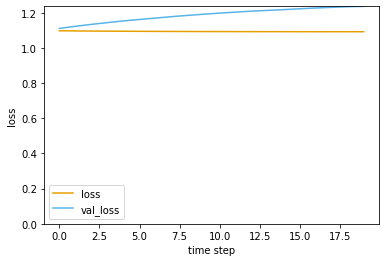

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import sys
from PIL import Image
from keras.datasets import mnist
from load_split_bin import load_split_bin

# keras用のパラメータ
batch_size = 128
#epochs = 500
epochs = 20

# mel画像のサイズ 縦(row)と横(col)
img_rows, img_cols = 128, 20

# 学習結果を保存するファイルの決定
#if len(sys.argv)==1:
#    print('使用法: python ml-10-03-digits-cnn-learn.py 保存ファイル名.h5')
#    sys.exit()
#savefile = sys.argv[1]
savefile = "mel.h5"

#    paths_for_train = ["./data/m01", "./data/m02", "./data/m03", "./data/m04", "./data/m05", 
#                       "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                       "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15",
#                       "./data/m16"] 

#paths_for_train = ["./data/m05", "./data/m06", "./data/m07", "./data/m08", "./data/m09", "./data/m10",
#                   "./data/m11", "./data/m12", "./data/m13", "./data/m14", "./data/m15", "./data/m16"] 

paths_for_train = ["./save_split_image/"]

# 手書き数字のデータをロードし、変数digitsに格納
# digits = datasets.load_digits()
# (X, y), (x_test, y_test) = mnist.load_data()
# X = np.concatenate(data)
# y = np.concatenate(label)
# np.random.seed(1)
# np.random.shuffle(X)
# np.random.seed(1)
# np.random.shuffle(y)
data = []
label = []
for i in range(len(paths_for_train)):
    path = paths_for_train[i]
    d = load_split_bin(path)
    data.append(d.data)
    label.append(d.target)
X = np.concatenate(data)
y = np.concatenate(label)

# 特徴量のセットを変数Xに、ターゲットを変数yに格納
#X = digits.data
#y = digits.target

# クラス数の取り出し
n_classes = len(np.unique(y))

# データXをCNN用の形式に変換
if K.image_data_format() == 'channels_first':
    X = X.reshape(X.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X = X.reshape(X.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
# ターゲットyをkeras用の形式に変換
y_keras = keras.utils.to_categorical(y, n_classes)

# 畳み込みニューラルネットワークを定義
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=n_classes, activation='softmax'))

# モデルのコンパイル
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'])

# モデルの学習
history = model.fit(X, y_keras, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=2)

# 結果の表示
result = model.predict_classes(X, verbose=0)

# データ数をtotalに格納
total = len(X)
# ターゲット（正解）と予測が一致した数をsuccessに格納
success = sum(result==y)

# 正解率をパーセント表示
print('正解率')
print(100.0*success/total)

# 学習結果を保存
model.save(savefile)

# 損失関数のグラフの軸ラベルを設定
plt.xlabel('time step')
plt.ylabel('loss')

# グラフ縦軸の範囲を0以上と定める
plt.ylim(0, max(np.r_[history.history['val_loss'], history.history['loss']]))

# 損失関数の時間変化を描画
val_loss, = plt.plot(history.history['val_loss'], c='#56B4E9')
loss, = plt.plot(history.history['loss'], c='#E69F00')

# グラフの凡例（はんれい）を追加
plt.legend([loss, val_loss], ['loss', 'val_loss'])

# 描画したグラフを表示
plt.show()

In [ ]:
rm save_wav_image/0/*).png